In [1]:
import sys

sys.path.insert(0, "../../plot/")

import os
import plot
import archive
import animation

import matplotlib.pyplot as plt

In [26]:
path = '../../test/'
path = '/home/liuzo/lustre/celadrodata/test_omega/zetascan_z5e-08_R4_omega0.001_LX100/'

In [27]:
ar = archive.loadarchive(path)

In [28]:
nframes = int((ar.nsteps-ar.nstart)/ar.ninfo)


In [29]:
nframes = len(os.listdir(path))

In [30]:
assert nframes>1, 'sim failed'

In [31]:
frame = ar.read_frame(nframes-5)

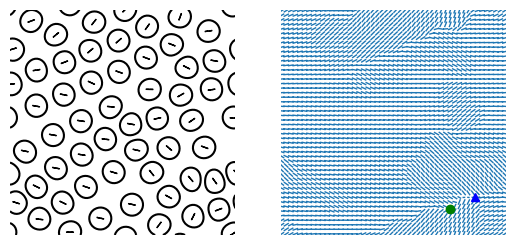

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plot.cells(frame, ax1)
plot.nematic(frame, ax1)

plot.nematic_field(frame, engine=ax2, avg=2, show_def=True)

for ax in [ax1, ax2]:
    ax.axes.set_aspect("equal", adjustable="box")
    ax.set_xlim([0, frame.parameters["Size"][0] - 1])
    ax.set_ylim([0, frame.parameters["Size"][1] - 1])
    ax.axis("off")


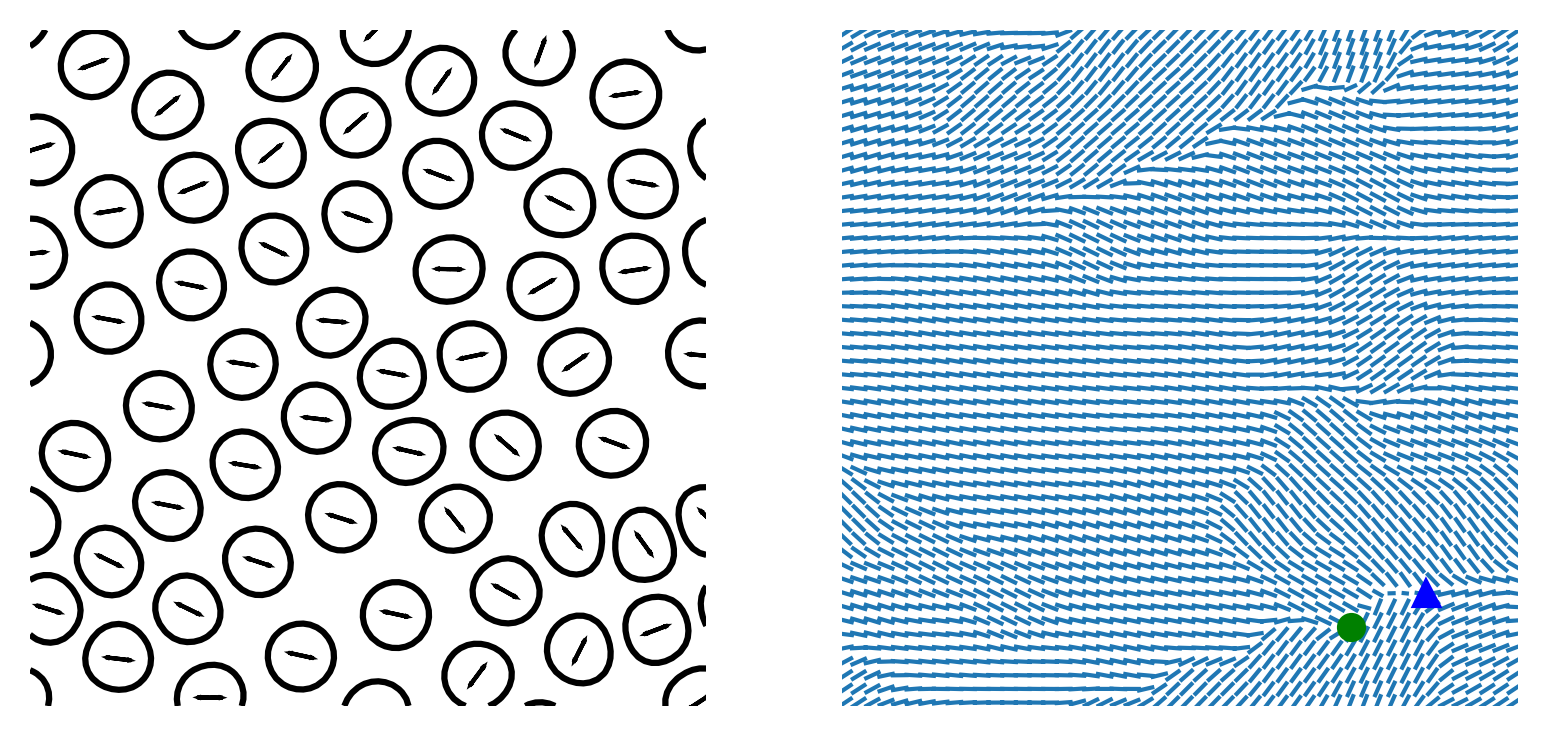

In [33]:
f, s = plt.subplots(1, 2, dpi=300)
plot.cells(frame, s[0])
plot.nematic(frame, s[0])

plot.nematic_field(frame, engine=s[1], avg=2, show_def=True)

for si in s:
    si.axes.set_aspect("equal", adjustable="box")
    si.set_xlim([0, frame.parameters["Size"][0] - 1])
    si.set_ylim([0, frame.parameters["Size"][1] - 1])
    si.axis("off")


In [10]:
def myplot(frame, fig):

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    plot.cells(frame, ax1)
    plot.nematic(frame, ax1)

    plot.nematic_field(frame, engine=ax2, avg=2, show_def=True)

    for ax in [ax1, ax2]:
        ax.axes.set_aspect("equal", adjustable="box")
        ax.set_xlim([0, frame.parameters["Size"][0] - 1])
        ax.set_ylim([0, frame.parameters["Size"][1] - 1])
        ax.axis("off")

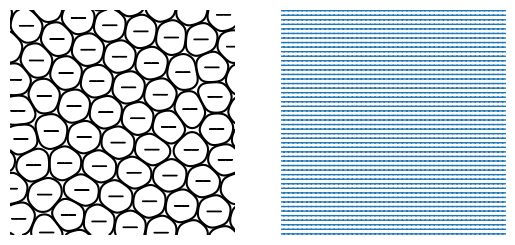

In [15]:
an = animation.animate(ar, myplot, show=False)
animation.save(an, 'out' + ".mp4", 5)